In [16]:
import numpy as np #useful in numeric computing
import pandas as pd #useful for data analysis and exploration
import matplotlib.pyplot as plt #useful for creating static, animated visuals
from sklearn.model_selection import train_test_split #scikit-learn - tools for splitting datasets, evaluating models
from keras.models import Sequential #for linear stack of layers
from keras.layers import Dense  #provides pre-defined blocks for DL models

white_wine  = pd.read_csv("Winequality-white.csv", sep=';')
red_wine  = pd.read_csv("Winequality-red.csv", sep=';')

In [ ]:
#first rows of red_wine
red_wine.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [4]:
#last rows of white_wine
white_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
#select 6 samples of red_wine
red_wine.sample(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
320,9.8,0.660,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,7
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6
1058,9.9,0.530,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6,7
658,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
736,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6


In [6]:
#check for null values
pd.isnull(red_wine)
pd.isnull(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


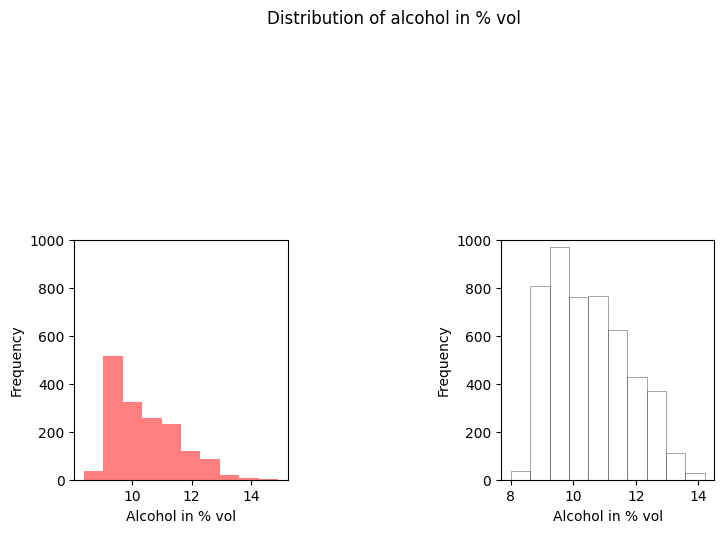

In [11]:
#create a histogram 
fig, ax= plt.subplots(1, 2)

ax[0].hist(red_wine.alcohol, 10, facecolor = 'red', alpha = .5, label = 'red wine')

ax[1].hist(white_wine.alcohol, 10, facecolor = 'white', lw = .5, alpha = .5, ec = 'black', label = 'white wine')

fig.subplots_adjust(left=0, right=1, bottom=0, top=.5, hspace = .05, wspace = 1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel('Alcohol in % vol')
ax[0].set_ylabel('Frequency')
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel('Alcohol in % vol')
ax[1].set_ylabel('Frequency')

fig.suptitle('Distribution of alcohol in % vol')
plt.show()


In [ ]:
# Add `type` column to `red` with price one
red_wine['type'] = 1
# Add `type` column to `white` with price zero
white_wine['type'] = 0

#concat 'red_wine' to 'white_wine' 
wines = pd.concat([red_wine, white_wine], ignore_index=True)

#iloc for position based indexing
x = wines.iloc[:, 0:11]
#ravel is used to reduce the dimentionality to 1
y = np.ravel(wines.type)

#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state= 45)


In [17]:
#initialise the constructor
model = Sequential()
#add an input layer
model.add(Dense(12, activation='relu', input_shape= (11, )))
#add an hidden layer
model.add(Dense(9, activation='relu'))
#add an output layer
model.add(Dense(1, activation='sigmoid'))


model.output_shape
model.summary()
model.get_config()

#list all weight sensors
model.get_weights()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

C:\Users\bindh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#training model
model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

#prediction of values
y_pred = model.predict(X_test)
print(y_pred)

Epoch 1/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 4s 567us/step - accuracy: 0.8721 - loss: 0.5762
Epoch 2/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 3s 564us/step - accuracy: 0.9404 - loss: 0.1854
Epoch 3/3
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 3s 616us/step - accuracy: 0.9400 - loss: 0.1764
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.04124746]
 [0.01498498]
 [0.01029176]
 ...
 [0.02268853]
 [0.01837597]
 [0.04209295]]
